# Stark effect plots
Calculating energy shifts due to motional magnetic fields in interaction region.
## Imports

In [6]:
import matplotlib.pyplot as plt
#plt.style.use(['seaborn-darkgrid','thesis'])
import numpy as np
from scipy.linalg import eigh

from centrex_TlF_hamiltonian.states import (State, CoupledBasisState, UncoupledBasisState, generate_uncoupled_states_ground, 
                                            find_state_idx_from_state, find_closest_vector_idx, ElectronicState, find_exact_states, 
                                            reorder_evecs)
from centrex_TlF_hamiltonian.hamiltonian import generate_uncoupled_hamiltonian_X, generate_uncoupled_hamiltonian_X_function, XConstants
from centrex_TlF_hamiltonian.hamiltonian.utils import matrix_to_states

## Diagonalizing Hamiltonian
We can also calculate the shifts in the energies of states by diagonalizing the Hamiltonian

Start by defining the X-state Hamiltonian

In [7]:
# Generate quantum numbers
QN_X_uc = generate_uncoupled_states_ground(range(0,6))

# Generate Hamiltonian as function of E and B
H_X_EB = generate_uncoupled_hamiltonian_X_function(generate_uncoupled_hamiltonian_X(QN_X_uc))

Define the states we're interested in

In [8]:
J2_0pp = 1*UncoupledBasisState(J=2, mJ=0, I1=1/2, m1=1/2, I2=1/2, m2=1/2,Omega=0, P=+1, electronic_state=ElectronicState.X)
J2_1pp = 1*UncoupledBasisState(J=2, mJ=1, I1=1/2, m1=1/2, I2=1/2, m2=1/2,Omega=0, P=1, electronic_state=ElectronicState.X)
J2_2pp = 1*UncoupledBasisState(J=2, mJ=2, I1=1/2, m1=1/2, I2=1/2, m2=1/2,Omega=0, P=1, electronic_state=ElectronicState.X)

Find the correct states at 30 kV/cm by repeatedly diagonalizing the Hamiltonian

In [9]:
Emin = 0
Emax = 500
B = np.array([0,0, 1e-6])

# Diagonalize the Hamiltonian at minimum electric field
H_min = H_X_EB(np.array([0,0,Emin]), B)
D, V_ref_0 = np.linalg.eigh(H_min)
V_ref = V_ref_0

# Find indices that correspond to each state
J2_0pp_i = find_closest_vector_idx(J2_0pp.state_vector(QN_X_uc),V_ref_0)
J2_1pp_i = find_closest_vector_idx(J2_1pp.state_vector(QN_X_uc),V_ref_0)
J2_2pp_i = find_closest_vector_idx(J2_2pp.state_vector(QN_X_uc),V_ref_0)

# Determine states at zero electric field (stored in V_ref)
for Ez in np.linspace(Emin, 0, 1000):
    H = H_X_EB(np.array([0,0,Ez]), B)
    D, V = np.linalg.eigh(H)
    _, V_ref = reorder_evecs(V, D, V_ref)

V_ref_diag = V_ref

# Determine states at large electric field (stored in V_ref)
energies = np.empty((1000, len(QN_X_uc)), dtype = float)
Ezs = np.linspace(0, Emax, len(energies))
for i, Ez in enumerate(Ezs):
    H = H_X_EB(np.array([0,0,Ez]), B)
    D, V = np.linalg.eigh(H)
    D, V_ref =  reorder_evecs(V, D, V_ref)
    energies[i,:] = D

Plot the energies

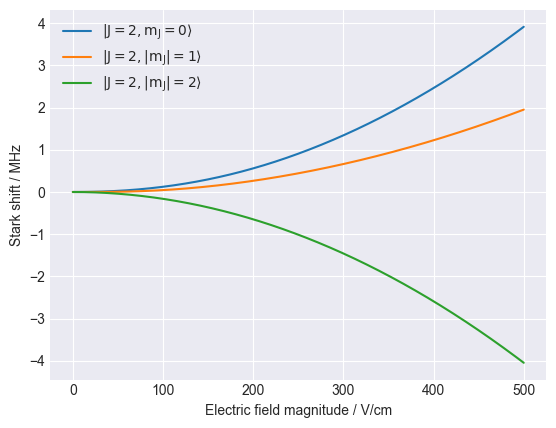

In [13]:
E_J2_0pp = (energies[:,J2_0pp_i] - energies[0,J2_0pp_i])/(2*np.pi)
E_J2_1pp = (energies[:,J2_1pp_i] - energies[0,J2_0pp_i])/(2*np.pi)
E_J2_2pp = (energies[:,J2_2pp_i] - energies[0,J2_0pp_i])/(2*np.pi)

fig, ax = plt.subplots()
ax.plot(Ezs, (E_J2_0pp)/1e6, label = r'$\mathrm{|J = 2, m_J = 0\rangle}$')
ax.plot(Ezs, (E_J2_1pp)/1e6, label = r'$\mathrm{|J = 2, |m_J| = 1\rangle}$')
ax.plot(Ezs, (E_J2_2pp)/1e6, label = r'$\mathrm{|J = 2, |m_J| = 2\rangle}$')
ax.set_xlabel('Electric field magnitude / V/cm')
ax.set_ylabel('Stark shift / MHz')
ax.legend()

plt.savefig('../SPB with E/figures/J2_stark_shift.pdf')